# Systems of Equations. RREF. LU Decomposition

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# sympy library for RREF
import sympy as sym

# scipy for LU
import scipy.linalg


# used to create non-regular subplots
import matplotlib.gridspec as gridspec

# RREF

In [28]:
# the augmented matrix
M = np.array([ [1,1,4],[-1/2,1,2] ])
print(M)
# numpy does not have a function to compute RREF of a matrix, but the sympy library does.
# converted into a sympy matrix
symMat = sym.Matrix(M)
print(symMat)

# RREF
symMat.rref()[0] # just the first output to get the RREF matrix (the second output is the indices of the pivots per row)

[[ 1.   1.   4. ]
 [-0.5  1.   2. ]]
Matrix([[1.00000000000000, 1.00000000000000, 4.00000000000000], [-0.500000000000000, 1.00000000000000, 2.00000000000000]])


Matrix([
[1, 0, 1.33333333333333],
[0, 1, 2.66666666666667]])

In [29]:
from sympy import Matrix

# Define the matrix
matrix = Matrix([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])
print(matrix),print(' ')

# Compute RREF
rref_matrix=matrix.rref()
print("RREF using sympy:")
print(rref_matrix)
matrix.rref()[0]

Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
 
RREF using sympy:
(Matrix([
[1, 0, -1],
[0, 1,  2],
[0, 0,  0]]), (0, 1))


Matrix([
[1, 0, -1],
[0, 1,  2],
[0, 0,  0]])

In [30]:
# make some random matrices (using sympy package)
from sympy import Matrix
A = Matrix( np.random.randn(4,4) )
B = Matrix( np.random.randn(4,3) )

# compute RREF
rrefA = A.rref()
rrefB = B.rref()

# print out the matrix and its rref
print(np.array(rrefA[0]))
print(' ')
print(np.array(rrefB[0]))



[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]
 [0 0 0 1]]
 
[[1 0 0]
 [0 1 0]
 [0 0 1]
 [0 0 0]]


# LU

In [13]:
import numpy as np

A = np.array([[1, -1, 3],
              [2, -3, 1],
              [3, 2, 1]])

# Print the matrix
print("Matrix A:\n", A), print(' ')

# Elimination matrices
E21 = np.array([[1, 0, 0],
              [-2, 1, 0],
              [0, 0, 1]])
E31 = np.array([[1, 0, 0],
              [0, 1, 0],
              [-3, 0, 1]])
E32 = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 5, 1]])

# Upper triangular
U=E32@E31@E21@A
print("U:\n",U),print(' ')

# inverses of Elimination matrices
E21_inv=np.linalg.inv(E21)
E31_inv=np.linalg.inv(E31)
E32_inv=np.linalg.inv(E32)

# Lower triangular
L=E21_inv@E31_inv@E32_inv
print("L:\n", L), print(' ')

# Verify LU decomposition
Answer=L@U
print("LU:\n", Answer)


Matrix A:
 [[ 1 -1  3]
 [ 2 -3  1]
 [ 3  2  1]]
 
U:
 [[  1  -1   3]
 [  0  -1  -5]
 [  0   0 -33]]
 
L:
 [[ 1.  0.  0.]
 [ 2.  1.  0.]
 [ 3. -5.  1.]]
 
LU:
 [[ 1. -1.  3.]
 [ 2. -3.  1.]
 [ 3.  2.  1.]]


In [31]:
# NOTE that the function for LU decomposition is in the SciPy library!

# a matrix
A = np.array([ [2,2,4], [1,0,3], [2,1,2] ])

# its LU decomposition via scipy 
# Here, P (the first value returned by lu) is ignored because it's not relevant for the task. 
# Using "_" makes the intent clear.
_,L,U = scipy.linalg.lu(A)
# print them out
print('L: ')
print(L), print(' ')

print('U: ')
print(U), print(' ')

print('A - LU: ')
print(A - L@U) # should be zeros

L: 
[[1.  0.  0. ]
 [0.5 1.  0. ]
 [1.  1.  1. ]]
 
U: 
[[ 2.  2.  4.]
 [ 0. -1.  1.]
 [ 0.  0. -3.]]
 
A - LU: 
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [32]:
import numpy as np
# Define a matrix A
A = np.array([[3, 2, 1],
              [6, 3, 5],
              [9, 8, 4]])

# Perform LU decomposition
# Here, P (the first value returned by lu) is ignored because it's not relevant for the task. 
# Using "_" makes the intent clear.
_, L, U = scipy.linalg.lu(A)

print("L (Lower triangular matrix):")
print(L)
print("\nU (Upper triangular matrix):")
print(U)


L (Lower triangular matrix):
[[1.         0.         0.        ]
 [0.66666667 1.         0.        ]
 [0.33333333 0.28571429 1.        ]]

U (Upper triangular matrix):
[[ 9.          8.          4.        ]
 [ 0.         -2.33333333  2.33333333]
 [ 0.          0.         -1.        ]]


[[0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]]
 
[[ 1.          0.          0.          0.          0.        ]
 [-0.07814551  1.          0.          0.          0.        ]
 [ 0.54380611  0.37587745  1.          0.          0.        ]
 [ 0.64024873 -0.71642996 -0.41257787  1.          0.        ]
 [-0.06730657  0.20164466 -0.12532599 -0.74168672  1.        ]]
 
[[-2.29729143  0.8815184  -1.79481731  1.22355525  1.89700874]
 [ 0.          1.71837267 -2.42732787  0.27918642  0.54219792]
 [ 0.          0.          3.970938   -1.93766637 -1.55590153]
 [ 0.          0.          0.          0.32984681 -1.29283494]
 [ 0.          0.          0.          0.         -1.41470087]]


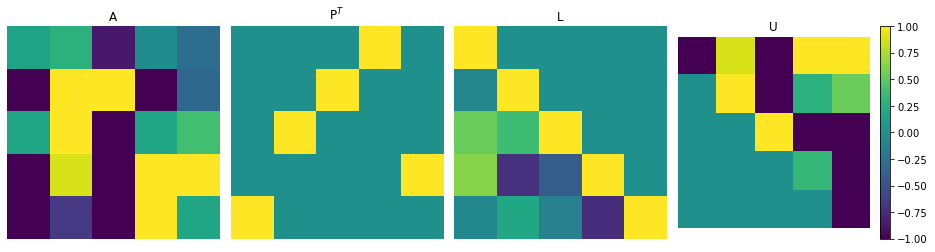

In [20]:
# matrix sizes
m = 5
n = 5

A = np.random.randn(m,n)

P,L,U = scipy.linalg.lu(A)
print(P), print(' ')
print(L),print(' ')
print(U)

# show the matrices

#Creates one row and five columns of subplots.Sets the figure size to 13 inches wide and 4 inches tall.
# axs is a list containing five subplots.
fig,axs = plt.subplots(1,4,figsize=(13,4))

# Displays matrix A as an image with values between -1 and 1. Labels this subplot as A.
axs[0].imshow(A,vmin=-1,vmax=1)
axs[0].set_title('A')

# Displays matrix P^{T} as an image with values between -1 and 1. Labels this subplot as P^{T}.
axs[1].imshow(P.T,vmin=-1,vmax=1)
axs[1].set_title(r'P$^T$')

# Displays matrix L as an image with values between -1 and 1. Labels this subplot as L.
axs[2].imshow(L,vmin=-1,vmax=1)
axs[2].set_title('L')

# Displays matrix U as an image with values between -1 and 1. Labels this subplot as U.
# h stores the image, which will be used for the colorbar later.
h = axs[3].imshow(U,vmin=-1,vmax=1)
axs[3].set_title('U')

#  Formatting all subplots. Hides axis ticks and labels.Ensures consistent x-axis limits for all subplots.
#  Ensures consistent y-axis limits (flipped to match image coordinates).
for a in axs:
  a.axis('off')
  a.set_xlim([-.5,n-.5])
  a.set_ylim([m-.5,-.5])

# Adds a colorbar to the last subplot (the U matrix)
fig.colorbar(h,ax=axs[-1],fraction=.05)
# Optimizes spacing between subplots.
plt.tight_layout()
# Saves the figure as a high-resolution PNG.
plt.savefig('Figure_LU_fact.png',dpi=300)
# Displays the figure
plt.show()